In [1]:
import pandas as pd
import numpy as np

In [2]:
names1880 = pd.read_csv(r'C:\Users\linda\Documents\python data\babynames\yob1880.txt', names=['name', 'sex', 'births'])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [4]:
names1880.groupby('sex')['births'].sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [5]:
years = range(1880, 2016)
pieces =[]
columns=['name', 'sex', 'births']



In [6]:
for year in years:
    path = r"C:\Users\linda\Documents\python data\babynames\yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] =year
    pieces.append(frame)

In [7]:
names =pd.concat(pieces, ignore_index =True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [9]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2011,1755278,1895156
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211


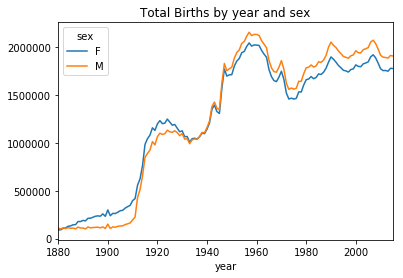

In [11]:
import matplotlib.pyplot as plt

total_births.plot(title='Total Births by year and sex')
plt.show()

In [16]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [17]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [20]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(),1)

True

In [22]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 =grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [23]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [24]:
boys = top1000[top1000.sex == 'M']

In [25]:
girls = top1000[top1000.sex == 'F']

In [26]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [27]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1880 to 2015
Columns: 7064 entries, Aaden to Zuri
dtypes: float64(7064)
memory usage: 7.3 MB


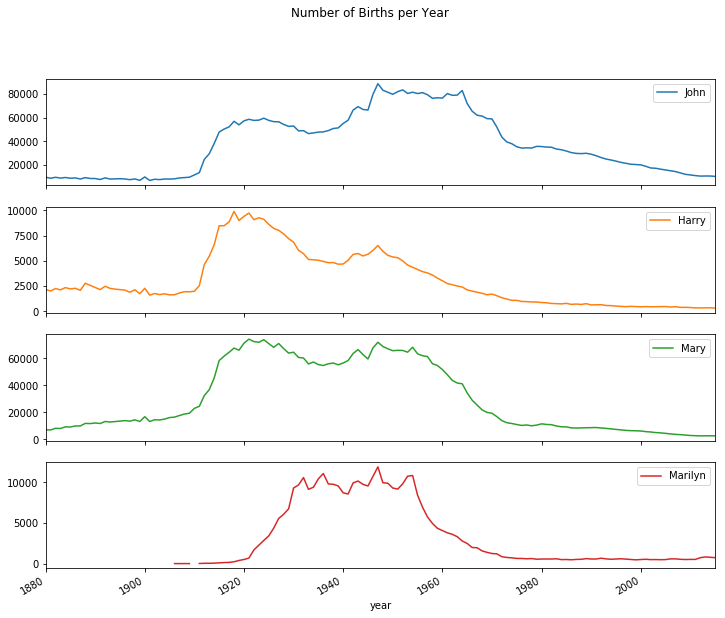

In [32]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of Births per Year')
plt.show()

In [33]:
table= top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

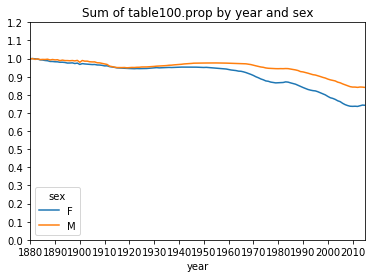

In [35]:
table.plot(title='Sum of table100.prop by year and sex', yticks=np.linspace(0,1.2, 13), xticks=range(1880,2020, 10) )
plt.show()

In [39]:
df= boys[boys.year ==2010]

In [40]:
df

,name,sex,births,year,prop
260877,Jacob,M,22110,2010,0.011544
260878,Ethan,M,17995,2010,0.009395
260879,Michael,M,17336,2010,0.009051
260880,Jayden,M,17163,2010,0.008961
260881,William,M,17042,2010,0.008898
260882,Alexander,M,16749,2010,0.008745
260883,Noah,M,16442,2010,0.008584
260884,Daniel,M,15827,2010,0.008263
260885,Aiden,M,15531,2010,0.008109
260886,Anthony,M,15482,2010,0.008083


In [42]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [43]:
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038951
260881    0.047849
260882    0.056593
260883    0.065178
260884    0.073441
260885    0.081550
260886    0.089633
Name: prop, dtype: float64

In [45]:
prop_cumsum.values.searchsorted(0.5)

116

In [46]:
df = boys[boys.year ==1900]

In [48]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [49]:
in1900.values.searchsorted(0.5) +1

25

In [54]:
def get_quantile_count(group, q=0.5):
    group= group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

In [55]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
    

In [56]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


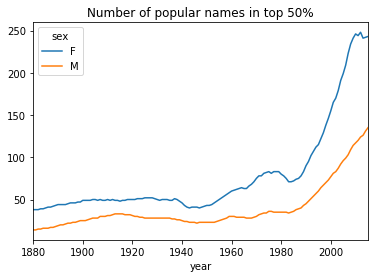

In [57]:
diversity.plot(title='Number of popular names in top 50%')
plt.show()

In [59]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table= names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)


In [62]:
subtable = table.reindex(columns=[1910,1960, 2010], level='year')

In [63]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691272.0  676436.0    977.0    5211.0   28846.0
b                 NaN     694.0     455.0    411.0    3912.0   39252.0
c                 5.0      49.0     955.0    482.0   15463.0   23332.0
d              6751.0    3729.0    2639.0  22113.0  262170.0   44795.0
e            133601.0  435062.0  316555.0  28665.0  178809.0  130187.0

In [64]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022104.0
     2010    1774186.0
M    1910     194215.0
     1960    2132705.0
     2010    1915331.0
dtype: float64

In [65]:
letter_prop = subtable/subtable.sum().astype(float)

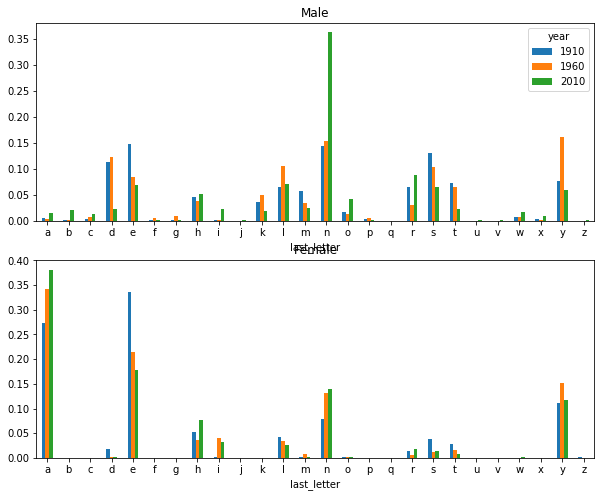

In [69]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot = 0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot = 0, ax=axes[1], title='Female', legend=False)
plt.show()

In [71]:
letter_prop = table / table.sum().astype(float)

In [73]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [74]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


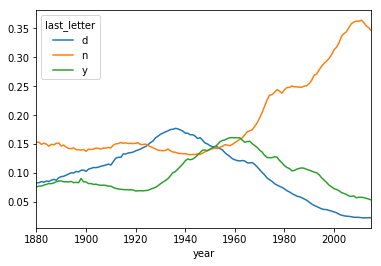

In [77]:
dny_ts.plot()
plt.show()

In [78]:
all_names= top1000.name.unique()

In [79]:
mask=np.array(['lesl' in x.lower() for x in all_names])

In [80]:
lesley_like = all_names[mask]

In [81]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [83]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [84]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376056
Lesly      11432
Name: births, dtype: int64

In [85]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [86]:
table= table.div(table.sum(1), axis =0)

In [87]:
table.tail()

sex,F,M
year,,
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN


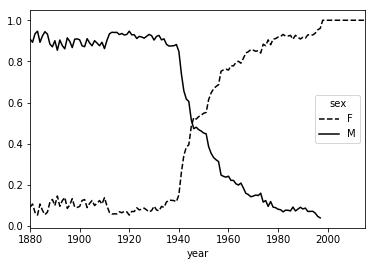

In [90]:
table.plot(style={'M':'k-', 'F':'k--'})
plt.show()